In [138]:
from itertools import permutations
import time
import math
import numpy as np

def time_func(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Function '{func.__name__}' took {elapsed_time:.6f} seconds to execute")
        return result
    return wrapper

def generate_distance_matrix(n):
    if n <= 0:
        raise ValueError("Number 'n' must be greater than 0.")

    # Create a random symmetric matrix with distances between 1 and 100
    distances = np.random.randint(1, 101, size=(n, n))
    distances_symmetric = (distances + distances.T) // 2  # Make the matrix symmetric

    # Set diagonal elements to 0 (distance from a node to itself)
    np.fill_diagonal(distances_symmetric, 0)

    return distances_symmetric

def calculate_total_distance(order, distances):
    total_distance = 0
    for i in range(len(order) - 1):
        total_distance += distances[order[i]][order[i + 1]]
    total_distance += distances[order[-1]][order[0]]  # Return to the starting city
    return total_distance


@time_func
def brute_force_tsp(distances, display_solutions=True, display_results=True):
    
    cities = [chr(ord('A') + i) for i in range(len(distances[0]))] # get list of cities name as letters.
    
    print(f'For {len(cities)} cities, departing and arriving from A, there are {math.factorial(len(cities)-1)} possible paths.')
    
    all_permutations = permutations(range(1,len(distances)))
    
    min_distance = float('inf')
    optimal_route = None
    
    i = 0
    for perm in all_permutations:
        perm = [0] + [i for i in perm]
        total_distance = calculate_total_distance(perm, distances)
        if total_distance < min_distance:
            min_distance = total_distance
            optimal_route = perm

        if display_solutions:
            print('-'.join([cities[i] for i in perm]), ', Distance: ', total_distance)

        i +=1
    
    if display_results:
        # Print the result
        print('Total number of paths:', i)
        print("Optimal Route:", [cities[i] for i in optimal_route])
        print("Minimum Distance:", min_distance)

    return optimal_route, min_distance



In [111]:


# City names

# Example distances (replace with your distances)
# Each element of the matrix is the distance from one city to another one. 
# For example, the distance from city A to B is equal to 5, so you can see the
# number 5 both in the matrix elements AB and BA. This is because it is a 
# simetry TSP example. To make an asymmetrical TSP problem, use different values
# for matrix elements AB and BA, which mean different distances depending on the direction. 
#
# matrix_example = [
#       A  B  C  D  E
#    A [0, 5, 3, 7, 4],
#    B [5, 0, 2, 6, 8],
#    C [3, 2, 0, 2, 2],
#    D [7, 6, 2, 0, 3],
#    E [4, 8, 2, 3, 0]
# ]
# To add more vertices, only add more elements to the matrix. 
# Make sure the main diagonal is zero and a square matrix. 



distances = [
    [0, 5, 3, 7, 4],
    [5, 0, 2, 6, 8],
    [3, 2, 0, 2, 2],
    [7, 6, 2, 0, 3],
    [4, 8, 2, 3, 0],
]

# Solve TSP
optimal_route, min_distance = brute_force_tsp(distances)


For 5 cities, departing and arriving from A, there are 24 possible paths.
A-B-C-D-E , Distance:  16
A-B-C-E-D , Distance:  19
A-B-D-C-E , Distance:  19
A-B-D-E-C , Distance:  19
A-B-E-C-D , Distance:  24
A-B-E-D-C , Distance:  21
A-C-B-D-E , Distance:  18
A-C-B-E-D , Distance:  23
A-C-D-B-E , Distance:  23
A-C-D-E-B , Distance:  21
A-C-E-B-D , Distance:  26
A-C-E-D-B , Distance:  19
A-D-B-C-E , Distance:  21
A-D-B-E-C , Distance:  26
A-D-C-B-E , Distance:  23
A-D-C-E-B , Distance:  24
A-D-E-B-C , Distance:  23
A-D-E-C-B , Distance:  19
A-E-B-C-D , Distance:  23
A-E-B-D-C , Distance:  23
A-E-C-B-D , Distance:  21
A-E-C-D-B , Distance:  19
A-E-D-B-C , Distance:  18
A-E-D-C-B , Distance:  16
Total number of paths: 24
Optimal Route: ['A', 'B', 'C', 'D', 'E']
Minimum Distance: 16
Function 'brute_force_tsp' took 0.000999 seconds to execute


In [108]:
distances = [
    [0, 5, 3, 7, 4, 5],
    [5, 0, 2, 6, 8, 2],
    [3, 2, 0, 2, 2, 2],
    [7, 6, 2, 0, 3, 13],
    [4, 8, 2, 3, 0, 6],
    [5, 2, 2, 13, 6, 0]
    
]

# Solve TSP
optimal_route, min_distance = brute_force_tsp(distances)




For 6 cities, departing and arriving from A, there are 120 possible paths.
A-B-C-D-E-F , Distance:  23
A-B-C-D-F-E , Distance:  32
A-B-C-E-D-F , Distance:  30
A-B-C-E-F-D , Distance:  35
A-B-C-F-D-E , Distance:  29
A-B-C-F-E-D , Distance:  25
A-B-D-C-E-F , Distance:  26
A-B-D-C-F-E , Distance:  25
A-B-D-E-C-F , Distance:  23
A-B-D-E-F-C , Distance:  25
A-B-D-F-C-E , Distance:  32
A-B-D-F-E-C , Distance:  35
A-B-E-C-D-F , Distance:  35
A-B-E-C-F-D , Distance:  37
A-B-E-D-C-F , Distance:  25
A-B-E-D-F-C , Distance:  34
A-B-E-F-C-D , Distance:  30
A-B-E-F-D-C , Distance:  37
A-B-F-C-D-E , Distance:  18
A-B-F-C-E-D , Distance:  21
A-B-F-D-C-E , Distance:  28
A-B-F-D-E-C , Distance:  28
A-B-F-E-C-D , Distance:  24
A-B-F-E-D-C , Distance:  21
A-C-B-D-E-F , Distance:  25
A-C-B-D-F-E , Distance:  34
A-C-B-E-D-F , Distance:  34
A-C-B-E-F-D , Distance:  39
A-C-B-F-D-E , Distance:  27
A-C-B-F-E-D , Distance:  23
A-C-D-B-E-F , Distance:  30
A-C-D-B-F-E , Distance:  23
A-C-D-E-B-F , Distance:  23
A

In [117]:

# Use the funcion generate_distance_matrix to create a random distance matrix 
# of integer distances between 0 to 100 for n cities. 

n = 7
distances = generate_distance_matrix(n)
print(distances)

# Solve TSP
optimal_route, min_distance = brute_force_tsp(distances)




[[ 0 39 30 86 48 48 31]
 [39  0 65 27 80 52 64]
 [30 65  0 15 65 62 71]
 [86 27 15  0 23 30 45]
 [48 80 65 23  0 50 83]
 [48 52 62 30 50  0 50]
 [31 64 71 45 83 50  0]]
For 7 cities, departing and arriving from A, there are 720 possible paths.
A-B-C-D-E-F-G , Distance:  273
A-B-C-D-E-G-F , Distance:  323
A-B-C-D-F-E-G , Distance:  313
A-B-C-D-F-G-E , Distance:  330
A-B-C-D-G-E-F , Distance:  345
A-B-C-D-G-F-E , Distance:  312
A-B-C-E-D-F-G , Distance:  303
A-B-C-E-D-G-F , Distance:  335
A-B-C-E-F-D-G , Distance:  325
A-B-C-E-F-G-D , Distance:  400
A-B-C-E-G-D-F , Distance:  375
A-B-C-E-G-F-D , Distance:  418
A-B-C-F-D-E-G , Distance:  333
A-B-C-F-D-G-E , Distance:  372
A-B-C-F-E-D-G , Distance:  315
A-B-C-F-E-G-D , Distance:  430
A-B-C-F-G-D-E , Distance:  332
A-B-C-F-G-E-D , Distance:  408
A-B-C-G-D-E-F , Distance:  341
A-B-C-G-D-F-E , Distance:  348
A-B-C-G-E-D-F , Distance:  359
A-B-C-G-E-F-D , Distance:  424
A-B-C-G-F-D-E , Distance:  326
A-B-C-G-F-E-D , Distance:  384
A-B-D-C-E-F-

In [124]:
n = 10
distances = generate_distance_matrix(n)
print(distances)
print()

# Solve TSP
optimal_route, min_distance = brute_force_tsp(distances, display_solutions=False)




[[ 0 65 42 75 85 70  8 39 70 21]
 [65  0 38 60 63 62 10 51 30 48]
 [42 38  0 53 51 74 42 96 34 67]
 [75 60 53  0 24 50 54 52 74 52]
 [85 63 51 24  0 41 43 58 20 67]
 [70 62 74 50 41  0 35 72 58 69]
 [ 8 10 42 54 43 35  0 38 45 59]
 [39 51 96 52 58 72 38  0 68 13]
 [70 30 34 74 20 58 45 68  0 25]
 [21 48 67 52 67 69 59 13 25  0]]

For 10 cities, departing and arriving from A, there are 362880 possible paths.
Total number of paths: 362880
Optimal Route: ['A', 'G', 'B', 'C', 'I', 'E', 'F', 'D', 'H', 'J']
Minimum Distance: 287
Function 'brute_force_tsp' took 1.120389 seconds to execute


In [123]:
n = 11
distances = generate_distance_matrix(n)
print(distances)
print()
# Solve TSP
optimal_route, min_distance = brute_force_tsp(distances, display_solutions=False)




[[ 0 85 49 50 38 14 63 96 87 45 43]
 [85  0 82 37 75 29 75 64 73 65 36]
 [49 82  0 40 69 72 42 55 59 22 59]
 [50 37 40  0 64 39 13 40 34 68 31]
 [38 75 69 64  0 85 43 63 44 92 31]
 [14 29 72 39 85  0 56 46 13 47 84]
 [63 75 42 13 43 56  0 68 63 18 67]
 [96 64 55 40 63 46 68  0 55 62  8]
 [87 73 59 34 44 13 63 55  0 51 92]
 [45 65 22 68 92 47 18 62 51  0 23]
 [43 36 59 31 31 84 67  8 92 23  0]]

For 11 cities, departing and arriving from A, there are 3628800 possible paths.
Total number of paths: 3628800
Optimal Route: ['A', 'C', 'J', 'G', 'D', 'H', 'K', 'B', 'F', 'I', 'E']
Minimum Distance: 310
Function 'brute_force_tsp' took 12.841635 seconds to execute


For 2 cities, departing and arriving from A, there are 1 possible paths.
Function 'brute_force_tsp' took 0.000000 seconds to execute
For 3 cities, departing and arriving from A, there are 2 possible paths.
Function 'brute_force_tsp' took 0.000000 seconds to execute
For 4 cities, departing and arriving from A, there are 6 possible paths.
Function 'brute_force_tsp' took 0.000000 seconds to execute
For 5 cities, departing and arriving from A, there are 24 possible paths.
Function 'brute_force_tsp' took 0.000000 seconds to execute
For 6 cities, departing and arriving from A, there are 120 possible paths.
Function 'brute_force_tsp' took 0.001010 seconds to execute
For 7 cities, departing and arriving from A, there are 720 possible paths.
Function 'brute_force_tsp' took 0.000998 seconds to execute
For 8 cities, departing and arriving from A, there are 5040 possible paths.
Function 'brute_force_tsp' took 0.013422 seconds to execute
For 9 cities, departing and arriving from A, there are 40320 

Text(0.5, 0, 'número de cidades')

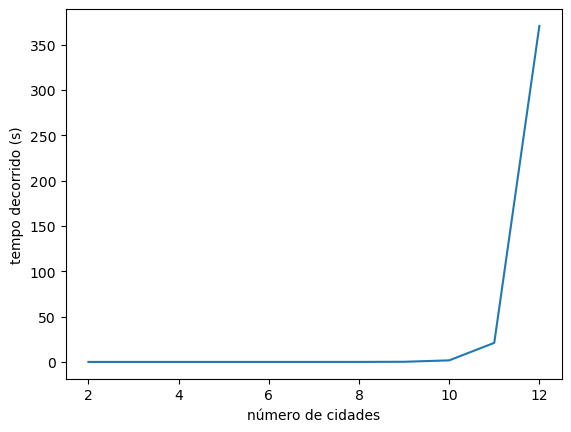

In [140]:
times = []
n = list(range(2,13))
for i in n:
    distances = generate_distance_matrix(i)
    
    start_time = time.time()

    optimal_route, min_distance = brute_force_tsp(distances, display_solutions=False, display_results=False)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

print(times)
import matplotlib.pyplot as plt

plt.plot(n, times)
plt.ylabel('tempo decorrido (s)')
plt.xlabel('número de cidades')